For this challenge, you will need to choose a corpus of data from nltk or another source that includes categories you can predict and create an analysis pipeline that includes the following steps:

1. Data cleaning / processing / language parsing
2. Create features using two different NLP methods: For example, BoW vs tf-idf.
3. Use the features to fit supervised learning models for each feature set to predict the category outcomes.
4. Assess your models using cross-validation and determine whether one model performed better.
5. Pick one of the models and try to increase accuracy by at least 5 percentage points.

Write up your report in a Jupyter notebook. Be sure to explicitly justify the choices you make throughout, and submit it below.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords

In [2]:
amazon_data = pd.read_csv('Food_Reviews.csv.zip')

In [3]:
amazon_data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [4]:
#Before I go any further I want to check in there are any null values in my dataset
print(amazon_data.isnull().sum())

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   26
Text                       0
dtype: int64


In [5]:
# Drop the null values because there are so few
amazon_data = amazon_data.dropna()

In [6]:
amazon_data.shape

(568412, 10)

In [7]:
# Select only the columns with text and the scores
data = amazon_data.iloc[:, -4:]

In [8]:
data = data.drop('Time', axis=1)

In [9]:
data

,Score,Summary,Text
0,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,2,Cough Medicine,If you are looking for the secret ingredient i...
4,5,Great taffy,Great taffy at a great price. There was a wid...
5,4,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,5,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,5,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,5,Yay Barley,Right now I'm mostly just sprouting this so my...
9,5,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [10]:
score = amazon_data.loc[:, 'Score']

In [11]:
score = np.where(score < 5, 0, 1)

(array([205301.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 363111.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

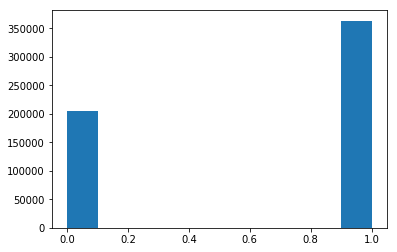

In [12]:
# Visualize the distribution of positive and negative scores
plt.hist(score)

In [13]:
data.Score = np.where(data.Score < 5, 0, 1)

In [14]:
# Separate the reviews into positive and negative dataframes
positive_df = data[data['Score']==1]
negative_df = data[data['Score']==0]

In [15]:
positive_df

,Score,Summary,Text
0,1,Good Quality Dog Food,I have bought several of the Vitality canned d...
4,1,Great taffy,Great taffy at a great price. There was a wid...
6,1,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,1,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,1,Yay Barley,Right now I'm mostly just sprouting this so my...
9,1,Healthy Dog Food,This is a very healthy dog food. Good for thei...
10,1,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...
11,1,"My cats LOVE this ""diet"" food better than thei...",One of my boys needed to lose some weight and ...
14,1,Strawberry Twizzlers - Yummy,The Strawberry Twizzlers are my guilty pleasur...
15,1,"Lots of twizzlers, just what you expect.",My daughter loves twizzlers and this shipment ...


# 1. Data cleaning / processing / language parsing

In [16]:
# Utility function to clean text.
def text_cleaner(text):
    
    # Visual inspection shows spaCy does not recognize the double dash '--'.
    # Better get rid of it now!
    text = re.sub(r'--',' ',text)
    
    # Get rid of headings in square brackets.
    text = re.sub("[^a-zA-Z0-9]", " ", text)
    
    # Get rid of extra whitespace.
    text = ' '.join(text.split())
    
    return text

In [17]:
# I took a small sample of my dataset so that my machine wouldn't crash on me.
positive_train = positive_df.sample(frac=0.03)
negative_train = negative_df.sample(frac=0.03)

In [18]:
# I updated the indexes
positive_train.index = range(len(positive_train))
negative_train.index = range(len(negative_train))

In [21]:
# Then I ran both of these sampled dataset through the text_cleaner function
for i in range(len(positive_train)):
    positive_train.iloc[i, 1] = text_cleaner(positive_train.iloc[i, 1])

In [22]:
for i in range(len(negative_train)):
    negative_train.iloc[i, 1] = text_cleaner(negative_train.iloc[i, 1])

In [25]:
# I made a list of these now cleaned statements
pos_summary_list = []
for i in range(len(positive_train)):
    pos_summary_list.append("{}.".format(positive_train.iloc[i, 1]).lower())
neg_summary_list = []
for i in range(len(negative_train)):
    neg_summary_list.append("{}.".format(negative_train.iloc[i, 1]).lower())

In [60]:
# I joined the statements into a single string so that I could use a BoW model
pos_summary_text = ' '.join(pos_summary_list)
neg_summary_text = ' '.join(neg_summary_list)

In [61]:
# Use Spacy's NLP on the positive string
nlp = spacy.load('en')
pos_summary_doc = nlp(pos_summary_text)

In [63]:
# Use Spacy's NLP on the negative string
neg_summary_doc = nlp(neg_summary_text)

In [65]:
# Let's explore the objects built.
print("The pos_summary_doc object is a {} object.".format(type(pos_summary_doc)))
print("It is {} tokens long".format(len(pos_summary_doc)))
print("The neg_summary_doc object is a {} object.".format(type(neg_summary_doc)))
print("It is {} tokens long".format(len(neg_summary_doc)))

The pos_summary_doc object is a <class 'spacy.tokens.doc.Doc'> object.
It is 53963 tokens long
The neg_summary_doc object is a <class 'spacy.tokens.doc.Doc'> object.
It is 34183 tokens long


In [66]:
from collections import Counter

# Utility function to calculate how frequently words appear in the text.
def word_frequencies(text, include_stop=True):
    
    # Build a list of words.
    # Strip out punctuation and, optionally, stop words.
    words = []
    for token in text:
        if not token.is_punct and (not token.is_stop or include_stop):
            words.append(token.text)
            
    # Build and return a Counter object containing word counts.
    return Counter(words)

In [67]:
# The most frequent words:
pos_summary_freq = word_frequencies(pos_summary_doc).most_common(10)
print('pos_summary_doc:', pos_summary_freq)
neg_summary_freq = word_frequencies(neg_summary_doc).most_common(10)
print('neg_summary_doc:', neg_summary_freq)

pos_summary_doc: [('great', 1752), ('the', 1070), ('best', 928), ('for', 775), ('love', 762), ('and', 730), ('a', 698), ('good', 696), ('my', 672), ('it', 564)]
neg_summary_doc: [('not', 901), ('good', 772), ('the', 618), ('but', 599), ('a', 520), ('for', 453), ('it', 439), ('great', 438), ('and', 351), ('i', 278)]


In [68]:
# Use our optional keyword argument to remove stop words.
pos_summary_freq = word_frequencies(pos_summary_doc, include_stop=False).most_common(10)
print('pos_summary_doc:', pos_summary_freq)
neg_summary_freq = word_frequencies(neg_summary_doc, include_stop=False).most_common(10)
print('neg_summary_doc:', neg_summary_freq)

pos_summary_doc: [('great', 1752), ('best', 928), ('love', 762), ('good', 696), ('coffee', 550), ('delicious', 528), ('tea', 496), ('product', 416), ('excellent', 362), ('food', 321)]
neg_summary_doc: [('good', 772), ('great', 438), ('taste', 270), ('coffee', 258), ('t', 219), ('like', 203), ('product', 200), ('s', 194), ('tea', 175), ('bad', 167)]


In [69]:
# Pull out just the text from our frequency lists.
positive_common = [pair[0] for pair in pos_summary_freq]
negative_common = [pair[0] for pair in neg_summary_freq]

# Use sets to find the unique values in each top ten.
print('Unique to Positive Summary:', set(positive_common) - set(negative_common))
print('Unique to Negative Summary:', set(negative_common) - set(positive_common))

Unique to Positive Summary: {'love', 'best', 'delicious', 'excellent', 'food'}
Unique to Negative Summary: {'taste', 't', 's', 'bad', 'like'}


In [70]:
# Utility function to calculate how frequently lemas appear in the text.
def lemma_frequencies(text, include_stop=True):
    
    # Build a list of lemas.
    # Strip out punctuation and, optionally, stop words.
    lemmas = []
    for token in text:
        if not token.is_punct and (not token.is_stop or include_stop):
            lemmas.append(token.lemma_)
            
    # Build and return a Counter object containing word counts.
    return Counter(lemmas)

In [71]:
# Instantiate our list of most common lemmas.
positive_lemma_freq = lemma_frequencies(pos_summary_doc, include_stop=False).most_common(10)
negative_lemma_freq = lemma_frequencies(neg_summary_doc, include_stop=False).most_common(10)
print('\nPositive:', positive_lemma_freq)
print('Negative:', negative_lemma_freq)


Positive: [('great', 1768), ('good', 1698), ('love', 1025), ('coffee', 556), ('delicious', 528), ('tea', 510), ('dog', 460), ('product', 434), ('excellent', 362), ('taste', 355)]
Negative: [('good', 920), ('great', 441), ('taste', 379), ('coffee', 260), ('like', 236), ('t', 219), ('flavor', 208), ('product', 208), ('bad', 201), ('s', 194)]


In [72]:
# Again, identify the lemmas common to one text but not the other.
positive_lemma_common = [pair[0] for pair in positive_lemma_freq]
negative_lemma_common = [pair[0] for pair in negative_lemma_freq]
print('Unique to Positive:', set(positive_lemma_common) - set(negative_lemma_common))
print('Unique to Negative:', set(negative_lemma_common) - set(positive_lemma_common))

Unique to Positive: {'love', 'tea', 'dog', 'delicious', 'excellent'}
Unique to Negative: {'t', 's', 'bad', 'flavor', 'like'}


## 2. Create features using two different NLP methods: For example, BoW vs tf-idf. Use the features to fit supervised learning models for each feature set to predict the category outcomes. Assess your models using cross-validation and determine whether one model performed better.

### Bad of Words Model

In [114]:
# Utility function to create a list of the 1000 most common words.
def bag_of_words(text):
    
    # Filter out punctuation and stop words.
    allwords = [token.lemma_
                for token in text
                if not token.is_punct
                and not token.is_stop]
    
    # Return the most common words.
    return [item[0] for item in Counter(allwords).most_common(1000)]

In [115]:
# Set up the bags.
positivewords = bag_of_words(pos_summary_doc)
negativewords = bag_of_words(neg_summary_doc)

# Combine bags to create a set of unique words.
common_words = set(positivewords + negativewords)

In [116]:
# Creates a data frame with features for each word in our common word set.
# Each value is the count of the times the word appears in each sentence.
def bow_features(sentences, common_words):
    
    # Scaffold the data frame and initialize counts to zero.
    df = pd.DataFrame(columns=common_words)
    df['text_sentence'] = sentences[0]
    df['text_source'] = sentences[1]
    df.loc[:, common_words] = 0
    
    # Process each row, counting the occurrence of words in each sentence.
    for i, sentence in enumerate(df['text_sentence']):
        
        # Convert the sentence to lemmas, then filter out punctuation,
        # stop words, and uncommon words.
        words = [token.lemma_
                 for token in sentence
                 if (
                     not token.is_punct
                     and not token.is_stop
                     and token.lemma_ in common_words
                 )]
        
        # Populate the row with word counts.
        for word in words:
            df.loc[i, word] += 1
        
        # This counter is just to make sure the kernel didn't hang.
        if i % 500 == 0:
            print("Processing row {}".format(i))
            
    return df

In [117]:
# Group into sentences.
positive_sents = [[sent, "Positive"] for sent in pos_summary_doc.sents]
negative_sents = [[sent, "Negative"] for sent in neg_summary_doc.sents]

# Combine the sentences from the two novels into one data frame.
sentences = pd.DataFrame(positive_sents + negative_sents)
sentences.head()

,0,1
0,"(k, cup, under, cabinet, holder, .)",Positive
1,"(kadoya, pure, sesame, oil, .)",Positive
2,"(yum, .)",Positive
3,"(fresh, and, delicious, .)",Positive
4,"(one, of, the, best, flavored, k, cups, .)",Positive


In [118]:
# Create our data frame with features. This can take a while to run.
word_counts = bow_features(sentences, common_words)
word_counts.head()

Processing row 0
Processing row 500
Processing row 1000
Processing row 1500
Processing row 2000
Processing row 2500
Processing row 3000
Processing row 3500
Processing row 4000
Processing row 4500
Processing row 5000
Processing row 5500
Processing row 6000
Processing row 6500
Processing row 7000
Processing row 7500
Processing row 8000
Processing row 8500
Processing row 9000
Processing row 9500
Processing row 10000
Processing row 10500
Processing row 11000
Processing row 11500
Processing row 12000
Processing row 12500
Processing row 13000
Processing row 13500
Processing row 14000
Processing row 14500
Processing row 15000
Processing row 15500
Processing row 16000
Processing row 16500


,feel,fructose,bite,h,plain,bulk,instant,blue,gooey,nutty,...,com,aware,awful,cider,ago,mediocre,fall,honest,text_sentence,text_source
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"(k, cup, under, cabinet, holder, .)",Positive
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"(kadoya, pure, sesame, oil, .)",Positive
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"(yum, .)",Positive
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"(fresh, and, delicious, .)",Positive
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"(one, of, the, best, flavored, k, cups, .)",Positive


In [119]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split

BoW_rfc = ensemble.RandomForestClassifier()
Y = word_counts['text_source']
X = np.array(word_counts.drop(['text_sentence','text_source'], 1))

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    Y,
                                                    test_size=0.4,
                                                    random_state=0)
train = BoW_rfc.fit(X_train, y_train)
print(rfc)
print('Training set score:', BoW_rfc.score(X_train, y_train))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Training set score: 0.9116430260047281


In [121]:
from sklearn.model_selection import cross_val_score
BoW_RFC_score = cross_val_score(BoW_rfc, X_test, y_test, cv=5)
print('\nEach Cross Validated Accuracy: \n', BoW_RFC_score)
print("\nOverall Random Forest Classifier R2: %0.2f (+/- %0.2f)\n" % (BoW_RFC_score.mean(), BoW_RFC_score.std() * 2))


Each Cross Validated R2 score: 
 [0.7202952  0.70605613 0.6940133  0.71322986 0.71027347]

Overall Random Forest Classifier R2: 0.71 (+/- 0.02)



In [126]:
from sklearn.linear_model import LogisticRegression

BoW_lr = LogisticRegression()
train = BoW_lr.fit(X_train, y_train)
print(train)
print('Training set score:', BoW_lr.score(X_train, y_train))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Training set score: 0.7977738376674547


In [123]:
BoW_lr_score = cross_val_score(BoW_lr, X_test, y_test, cv=5)
print('\nEach Cross Validated Accuracy: \n', BoW_lr_score)
print("\nOverall Logistic Regression Classifier R2: %0.2f (+/- %0.2f)\n" % (BoW_lr_score.mean(), BoW_lr_score.std() * 2))


Each Cross Validated Accuracy: 
 [0.72915129 0.74815362 0.73688101 0.74870658 0.72357724]

Overall Logistic Regression Classifier R2: 0.74 (+/- 0.02)



In [128]:
BoW_clf = ensemble.GradientBoostingClassifier()
train = BoW_clf.fit(X_train, y_train)
print(train)
print('Training set score:', BoW_clf.score(X_train, y_train))

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
Training set score: 0.7096138691883372


In [129]:
BoW_clf_score = cross_val_score(BoW_clf, X_test, y_test, cv=5)
print('\nEach Cross Validated Accuracy: \n', BoW_clf_score)
print("\nOverall Gradient Boosting Classifier R2: %0.2f (+/- %0.2f)\n" % (BoW_clf_score.mean(), BoW_clf_score.std() * 2))


Each Cross Validated Accuracy: 
 [0.69077491 0.70236337 0.70140429 0.70362158 0.69992609]

Overall Gradient Boosting Classifier R2: 0.70 (+/- 0.01)



### Term-frequency--Inverse Document Frequency Model

In [130]:
# I joined together the lists of these cleaned statements
entire_list = pos_summary_list + neg_summary_list

In [131]:
# I joined the scores of the positive and negative dataframes into a single list. 
positive = list(positive_train.Score)
negative = list(negative_train.Score)
total = positive + negative

In [132]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(entire_list, test_size=0.4, random_state=0)

vectorizer = TfidfVectorizer(max_df=0.5, # drop words that occur in more than half the paragraphs
                             min_df=2, # only use words that appear at least twice
                             stop_words='english', 
                             lowercase=True, #convert everything to lower case (since Alice in Wonderland has the HABIT of CAPITALIZING WORDS for EMPHASIS)
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )


#Applying the vectorizer
summary_list_tfidf=vectorizer.fit_transform(entire_list)
print("Number of features: %d" % summary_list_tfidf.get_shape()[1])

#splitting into training and test sets
X_train_tfidf, X_test_tfidf, train_score, test_score = train_test_split(summary_list_tfidf,
                                                                        total,
                                                                        test_size=0.4, 
                                                                        random_state=0)


#Reshapes the vectorizer output into something people can read
X_train_tfidf_csr = X_train_tfidf.tocsr()

#number of paragraphs
n = X_train_tfidf_csr.shape[0]
#A list of dictionaries, one per paragraph
tfidf_bypara = [{} for _ in range(0,n)]
#List of features
terms = vectorizer.get_feature_names()
#for each paragraph, lists the feature words and their tf-idf scores
for i, j in zip(*X_train_tfidf_csr.nonzero()):
    tfidf_bypara[i][terms[j]] = X_train_tfidf_csr[i, j]

#Keep in mind that the log base 2 of 1 is 0, so a tf-idf score of 0 indicates that the word was present once in that sentence.
print('Original sentence:', X_train[5])
print('Tf_idf vector:', tfidf_bypara[5])

Number of features: 3051
Original sentence: grind too fine.
Tf_idf vector: {'grind': 0.7984876954266765, 'fine': 0.6020111296746891}


In [133]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

#Our SVD data reducer.  We are going to reduce the feature space from 3051 to 130.
svd= TruncatedSVD(130)
lsa = make_pipeline(svd, Normalizer(copy=False))
# Run SVD on the training data, then project the training data.
X_train_lsa = lsa.fit_transform(X_train_tfidf)

variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)

#Looking at what sorts of paragraphs our solution considers similar, for the first five identified topics
paras_by_component=pd.DataFrame(X_train_lsa,index=X_train)
for i in range(5):
    print('Component {}:'.format(i))
    print(paras_by_component.loc[:,i].sort_values(ascending=False)[0:10])

Percent variance captured by all components: 47.615726468100945
Component 0:
great for weight loss.    0.883132
great for colds flu.      0.882821
great for dehydration.    0.881971
great.                    0.881971
great.                    0.881971
great.                    0.881971
great.                    0.881971
great.                    0.881971
great.                    0.881971
great.                    0.881971
Name: 0, dtype: float64
Component 1:
good on the go.                 0.934853
not good at all.                0.934853
very good.                      0.934853
not so good.                    0.934853
very good.                      0.934853
it s good.                      0.934853
not too good.                   0.934853
very good.                      0.934853
not so good.                    0.934853
very good for what they are.    0.934853
Name: 1, dtype: float64
Component 2:
people either love or hate valerian.    0.979334
love it.                                

In [136]:
tf_idf_rfc = ensemble.RandomForestClassifier()
train = tf_idf_rfc.fit(X_train_lsa, train_score)

# Run SVD on the testing data, then project the testing data.
X_test_lsa = lsa.transform(X_test_tfidf)

print(train)
print('Training set score:', tf_idf_rfc.score(X_train_lsa, train_score))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Training set score: 0.9378359886619099


In [137]:
tf_idf_RFC_score = cross_val_score(tf_idf_rfc, X_test_lsa, test_score, cv=5)
print('\nEach Cross Validated Accuracy: \n', tf_idf_RFC_score)
print("\nOverall Random Forest Classifier R2: %0.2f (+/- %0.2f)\n" % (tf_idf_RFC_score.mean(), tf_idf_RFC_score.std() * 2))


Each Cross Validated Accuracy: 
 [0.69230769 0.69721408 0.68914956 0.70821114 0.6840176 ]

Overall Random Forest Classifier R2: 0.69 (+/- 0.02)



In [139]:
tf_idf_lr = LogisticRegression()
train = tf_idf_lr.fit(X_train_lsa, train_score)
print(train)
print('Training set score:', tf_idf_lr.score(X_train_lsa, train_score))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Training set score: 0.7287655165672955


In [140]:
tf_idf_lr_score = cross_val_score(tf_idf_lr, X_test_lsa, test_score, cv=5)
print('\nEach Cross Validated Accuracy: \n', tf_idf_lr_score)
print("\nOverall Logistic Regression Classifier R2: %0.2f (+/- %0.2f)\n" % (tf_idf_lr_score.mean(), tf_idf_lr_score.std() * 2))


Each Cross Validated Accuracy: 
 [0.71721612 0.70527859 0.70601173 0.71627566 0.70087977]

Overall Logistic Regression Classifier R2: 0.71 (+/- 0.01)



In [143]:
tf_idf_clf = ensemble.GradientBoostingClassifier()
train = tf_idf_clf.fit(X_train_lsa, train_score)
print(train)
print('Training set score:', clf.score(X_train_lsa, train_score))

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
Training set score: 0.7325774606587822


In [144]:
tf_idf_clf_score = cross_val_score(tf_idf_clf, X_test_lsa, test_score, cv=5)
print('\nEach Cross Validated Accuracy: \n', tf_idf_clf_score)
print("\nOverall Gradient Boosting Classifier R2: %0.2f (+/- %0.2f)\n" % (tf_idf_clf_score.mean(), tf_idf_clf_score.std() * 2))


Each Cross Validated Accuracy: 
 [0.73186813 0.71260997 0.72727273 0.71994135 0.70601173]

Overall Gradient Boosting Classifier R2: 0.72 (+/- 0.02)



## 5. Pick one of the models and try to increase accuracy by at least 5 percentage points.

In [263]:
X_train, X_test = train_test_split(entire_list, test_size=0.4, random_state=0)

vectorizer = TfidfVectorizer(max_df=0.7, # drop words that occur in more than half the paragraphs
                             min_df=10, # only use words that appear at least twice
                             stop_words='english', 
                             lowercase=True, #convert everything to lower case (since Alice in Wonderland has the HABIT of CAPITALIZING WORDS for EMPHASIS)
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=False #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )


#Applying the vectorizer
summary_list_tfidf=vectorizer.fit_transform(entire_list)
print("Number of features: %d" % summary_list_tfidf.get_shape()[1])

#splitting into training and test sets
X_train_tfidf, X_test_tfidf, train_score, test_score = train_test_split(summary_list_tfidf,
                                                                        total,
                                                                        test_size=0.4, 
                                                                        random_state=0)


#Reshapes the vectorizer output into something people can read
X_train_tfidf_csr = X_train_tfidf.tocsr()

#number of paragraphs
n = X_train_tfidf_csr.shape[0]
#A list of dictionaries, one per paragraph
tfidf_bypara = [{} for _ in range(0,n)]
#List of features
terms = vectorizer.get_feature_names()
#for each paragraph, lists the feature words and their tf-idf scores
for i, j in zip(*X_train_tfidf_csr.nonzero()):
    tfidf_bypara[i][terms[j]] = X_train_tfidf_csr[i, j]

Number of features: 703


In [276]:
#Our SVD data reducer.  We are going to reduce the feature space from 3051 to 200.
svd= TruncatedSVD(600)
lsa = make_pipeline(svd, Normalizer(copy=False))
# Run SVD on the training data, then project the training data.
X_train_lsa = lsa.fit_transform(X_train_tfidf)
# Run SVD on the testing data, then project the testing data.
X_test_lsa = lsa.transform(X_test_tfidf)

variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)

#Looking at what sorts of paragraphs our solution considers similar, for the first five identified topics
#paras_by_component=pd.DataFrame(X_train_lsa,index=X_train)

Percent variance captured by all components: 97.43633242963357


In [281]:
tf_idf_lr = LogisticRegression(penalty='l1')
train = tf_idf_lr.fit(X_train_lsa, train_score)
print(train)
print('Training set score:', tf_idf_lr.score(X_train_lsa, train_score))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Training set score: 0.7602384908611084


In [282]:
tf_idf_lr_score = cross_val_score(tf_idf_lr, X_test_lsa, test_score, cv=5)
print('\nEach Cross Validated Accuracy: \n', tf_idf_lr_score)
print("\nOverall Logistic Regression Classifier R2: %0.2f (+/- %0.2f)\n" % (tf_idf_lr_score.mean(), tf_idf_lr_score.std() * 2))


Each Cross Validated Accuracy: 
 [0.74652015 0.72067449 0.72434018 0.7228739  0.71407625]

Overall Logistic Regression Classifier R2: 0.73 (+/- 0.02)



# Conclusion

This was a difficult challenge for me due to my computer's issues with processing the data and this being my first deep dive into Natural Language Processing. I can see that a number of decisions during each step of my data processing affected my model's accuracy. For example, when I started to clean up the text, my text cleaning function removed all forms of punctuation. I have seen how this limited the BoW and TF_IDF methods' ability to separate contractions into their own words. 

Then it came time to use models with these methods to predict the rating of the statements. None of my models did significantly better than the others. The accuracy always seemed to stay around 70% for both methods and three different types of models. Now, when I tried to increase my score by 5 points I decided to use the Logistic Regression Classifier because it didn't overfit as much as the random forest, it ran faster that the Gradient Boosting Classifier, and its accuracy was consistent for both methods. I tried to increase the score by first adjusting the vectorizer parameters and changing the max or minimum document frequency but it showed no improvement to the accuracy. Next, I adjusted the SVD reducer so that it did not decrease the number of features so sharply. This lead to the only noticeable improvement in my accuracy because it went up to 0.73. The last change I did was to make the Logistic Regression model a Lasso model, however this did not make any change in my model's behavior or accuracy. 